In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import caffe
import score

In [2]:
caffe.set_device(0)
caffe.set_mode_gpu()

caffe_root = '/home/cv/hdl/caffe'
models = '{}/models'.format(caffe_root)

# load image, switch to BGR, subtract mean, and make dims C x H x W for Caffe
im = Image.open('/home/cv/grayson/me.jpeg')
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ -= np.array((104.00698793,116.66876762,122.67891434))
in_ = in_.transpose((2,0,1))

# load net
# net = caffe.Net('model/deploy.prototxt',
#                 '{}/pascalpart-fcn32s/person/head/old_snapshots/train_iter_176000.caffemodel'.format(models), 
#                 caffe.TEST)
net = caffe.Net('model/deploy.prototxt',
                '../alt_vgg16fc.caffemodel'.format(models), 
                caffe.TEST)

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_

# must do forward pass or else blobs and deconv params will be all zeroes
net.forward()    

{'loss': array([[[[ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          ..., 
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909]],
 
         [[ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          [ 0.09090909,  0.09090909,  0.09090909, ...,  0.09090909,
            0.09090909,  0.09090909],
          ..., 
   

In [3]:
#solver = caffe.SGDSolver('solver.prototxt')
#val = np.loadtxt('/home/cv/hdl/caffe/data/pascal/VOC/VOC2010/ImageSets/person/head_val.txt', dtype=str)

In [4]:
#hist, loss = score.compute_hist(solver.test_nets[0], 'segmentation_results', val, layer='score', gt='label' )

In [5]:
net.blobs['score'].channels

11

In [6]:
# blobs
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 3, 600, 480)),
 ('data_input_0_split_0', (1, 3, 600, 480)),
 ('data_input_0_split_1', (1, 3, 600, 480)),
 ('conv1_1', (1, 64, 798, 678)),
 ('conv1_2', (1, 64, 798, 678)),
 ('pool1', (1, 64, 399, 339)),
 ('conv2_1', (1, 128, 399, 339)),
 ('conv2_2', (1, 128, 399, 339)),
 ('pool2', (1, 128, 200, 170)),
 ('conv3_1', (1, 256, 200, 170)),
 ('conv3_2', (1, 256, 200, 170)),
 ('conv3_3', (1, 256, 200, 170)),
 ('pool3', (1, 256, 100, 85)),
 ('conv4_1', (1, 512, 100, 85)),
 ('conv4_2', (1, 512, 100, 85)),
 ('conv4_3', (1, 512, 100, 85)),
 ('pool4', (1, 512, 50, 43)),
 ('conv5_1', (1, 512, 50, 43)),
 ('conv5_2', (1, 512, 50, 43)),
 ('conv5_3', (1, 512, 50, 43)),
 ('pool5', (1, 512, 25, 22)),
 ('fc6', (1, 4096, 19, 16)),
 ('fc7', (1, 4096, 19, 16)),
 ('score_fr', (1, 11, 19, 16)),
 ('upscore', (1, 11, 640, 544)),
 ('score', (1, 11, 600, 480)),
 ('loss', (1, 11, 600, 480))]

In [7]:
# parameters
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1_1', (64, 3, 3, 3)),
 ('conv1_2', (64, 64, 3, 3)),
 ('conv2_1', (128, 64, 3, 3)),
 ('conv2_2', (128, 128, 3, 3)),
 ('conv3_1', (256, 128, 3, 3)),
 ('conv3_2', (256, 256, 3, 3)),
 ('conv3_3', (256, 256, 3, 3)),
 ('conv4_1', (512, 256, 3, 3)),
 ('conv4_2', (512, 512, 3, 3)),
 ('conv4_3', (512, 512, 3, 3)),
 ('conv5_1', (512, 512, 3, 3)),
 ('conv5_2', (512, 512, 3, 3)),
 ('conv5_3', (512, 512, 3, 3)),
 ('fc6', (4096, 512, 7, 7)),
 ('fc7', (4096, 4096, 1, 1)),
 ('score_fr', (11, 4096, 1, 1)),
 ('upscore', (11, 11, 64, 64))]

In [21]:
# conv layer weights (edge_detectors)
print net.params['fc6'][0].data

[[[[  1.97458430e-05   4.53990098e-04   5.56625135e-04 ...,
      1.49902713e-03   3.65451677e-04   1.45425636e-03]
   [ -1.38145685e-03  -2.75150430e-03  -3.71294585e-03 ...,
     -6.78197131e-04   4.26926650e-04   1.24705199e-03]
   [ -1.17486843e-03   1.23531697e-03   5.79809348e-05 ...,
     -1.38900557e-03   2.76348297e-03   3.16231558e-03]
   ..., 
   [  4.61630803e-03   1.36438292e-03  -5.23926225e-04 ...,
      2.41893460e-03   3.71263176e-03   2.65824422e-03]
   [  3.43640870e-03   2.71669612e-03   1.28507940e-03 ...,
      2.55755731e-03   2.21986766e-03   1.01891113e-03]
   [  1.14559184e-03   2.91841384e-03   8.12160491e-04 ...,
      1.57311140e-03   1.66344701e-03   2.67237029e-03]]

  [[ -5.35124633e-03  -2.54228082e-03  -4.39856201e-04 ...,
     -2.62383930e-03  -1.67081447e-03  -3.95305594e-03]
   [ -2.59403046e-03  -2.70731770e-03  -2.04123906e-03 ...,
     -2.17196159e-03  -1.38176861e-03  -2.08440213e-03]
   [ -1.92047225e-03  -2.86271796e-03  -2.10433616e-03 ...,
 

In [22]:
# deconv layer weights
print net.params['conv1_1'][0].data

[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 ..., 
 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]


In [17]:
# data blob
print net.blobs['data'].data

[[[[  87.99301147   88.99301147   88.99301147 ...,  -98.00698853
     -94.00698853  -91.00698853]
   [  87.99301147   88.99301147   88.99301147 ...,  -96.00698853
     -89.00698853  -83.00698853]
   [  87.99301147   88.99301147   88.99301147 ...,  -77.00698853
     -67.00698853  -61.00698853]
   ..., 
   [ -77.00698853  -76.00698853  -80.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]
   [ -75.00698853  -73.00698853  -76.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]
   [ -74.00698853  -70.00698853  -72.00698853 ...,  -93.00698853
     -94.00698853  -95.00698853]]

  [[  75.33123016   76.33123016   76.33123016 ..., -110.66876984
    -106.66876984 -103.66876984]
   [  75.33123016   76.33123016   76.33123016 ..., -108.66876984
    -101.66876984  -95.66876984]
   [  75.33123016   76.33123016   76.33123016 ...,  -89.66876984
     -79.66876984  -73.66876984]
   ..., 
   [ -89.66876984  -88.66876984  -92.66876984 ..., -105.66876984
    -106.66876984 -107.66876984]


In [18]:
# conv1_1 blob
print net.blobs['conv1_1'].data

[[[[ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]
   [ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]
   [ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]
   ..., 
   [ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]
   [ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]
   [ 0.73429835  0.73429835  0.73429835 ...,  0.73429835  0.73429835
     0.73429835]]

  [[ 0.09340367  0.09340367  0.09340367 ...,  0.09340367  0.09340367
     0.09340367]
   [ 0.09340367  0.09340367  0.09340367 ...,  0.09340367  0.09340367
     0.09340367]
   [ 0.09340367  0.09340367  0.09340367 ...,  0.09340367  0.09340367
     0.09340367]
   ..., 
   [ 0.09340367  0.09340367  0.09340367 ...,  0.09340367  0.09340367
     0.09340367]
   [ 0.09340367  0.09340367  0.09340367 ...,  0.09340367  0.09340367
     0.09340367]
   [ 0.09340367  0.09340367  0.093

In [19]:
# pool1 blob
print net.blobs['pool1'].data

[[[[ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]
   [ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]
   [ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]
   ..., 
   [ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]
   [ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]
   [ 1.58655763  1.58655763  1.58655763 ...,  1.58655763  1.58655763
     1.58655763]]

  [[ 1.97519255  1.97519255  1.97519255 ...,  1.97519255  1.97519255
     2.76630735]
   [ 1.97519255  1.97519255  1.97519255 ...,  1.97519255  1.97519255
     2.76630735]
   [ 1.97519255  1.97519255  1.97519255 ...,  1.97519255  1.97519255
     2.76630735]
   ..., 
   [ 1.97519255  1.97519255  1.97519255 ...,  1.97519255  1.97519255
     2.76630735]
   [ 1.97519255  1.97519255  1.97519255 ...,  1.97519255  1.97519255
     2.76630735]
   [ 2.61168051  2.61168051  2.611

In [20]:
# upscore blob
print net.blobs['upscore'].data.shape
print net.blobs['upscore'].data

(1, 11, 640, 544)
[[[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  ..., 
  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   

(11, 600, 480)
Image size: (600, 480)
Detected object classes: [0]


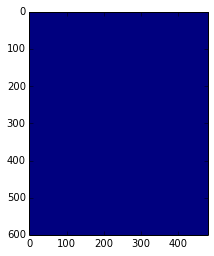

In [21]:
higher_level_filter = net.params['fc7'][0].data         # weights
# Recall: blob dimensions are N x C x H x W
print net.blobs['score'].data[0].shape
out = net.blobs['score'].data[0].argmax(axis=0)
imgplot = plt.imshow(out)
print 'Image size:', out.shape
print 'Detected object classes:', np.unique(out)